# Employee Turnover Prediction Starter Workbook

This workbook was started by the data scientist who originally worked on this project. It is organized around the following steps:
1. Import and Clean data
2. Explore data
3. Model features
4. Model data
5. Evaluate models

In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

## 1. Import and Clean Data

In [7]:
#Read in the data files
data = pd.read_csv("../data/general_data.csv",sep=",")

In [8]:
#Examine the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                4410 non-null   object 
 1   Age                      4410 non-null   int64  
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [9]:
#Let's view some of the sample data
pd.set_option("display.max_columns", None)
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,No,51,Travel_Rarely,Sales,5,2,Life_Sciences,1,1,Female,1,Healthcare_Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,1,3,3.0,4.0,3.0
1,No,32,Travel_Frequently,Research_Development,14,4,Other,1,3,Male,4,Sales_Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,2,3.0,2.0,2.0
2,No,38,Non-Travel,Research_Development,2,5,Life_Sciences,1,4,Male,3,Human_Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,3,4,2.0,2.0,4.0
3,No,32,Travel_Rarely,Research_Development,8,1,Medical,1,5,Male,1,Sales_Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,1,3,4.0,4.0,3.0
4,No,46,Travel_Rarely,Research_Development,6,3,Life_Sciences,1,6,Female,4,Research_Director,Married,40710,3.0,Y,13,8,0,28.0,5,7,7,7,3,3,4.0,3.0,2.0


In [10]:
#Determine the shape of the data frame.
data.shape

(4410, 29)

#### Design Note 1.1

The data frame is 4410 rows x 24 columns. ```Attrition``` is a dichotomous ("Yes/No") field that indicates if the employee left the organization. This variable will serve as our response variable (i.e. y-variable in the logistic model). The other columns listed are potenial predictor variables. We should do some exploratory data analysis to see which potential predictors have the most potential for modeling. 

In [11]:
#Let's look at the descriptives. Questions we may ask:
#1. Are the minimums and maximums reasonable?
#2. What do the means tell us about the nature of the sample?
#3. Are there any columns that lack variance necessary for value in prediction?
data.describe().round(1)

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4391.0,4410.0,4410.0,4410.0,4401.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4385.0,4390.0,4388.0
mean,36.9,8.0,2.9,1.0,2205.5,2.1,65029.3,2.7,14.4,8.0,0.8,11.3,2.8,7.0,2.2,4.1,3.0,3.0,2.9,3.1,3.0
std,9.1,7.1,1.0,0.0,1273.2,1.1,47068.9,2.5,4.2,0.0,0.9,7.8,1.3,6.1,3.2,3.6,0.6,0.9,1.1,0.9,0.9
min,18.0,1.0,1.0,1.0,1.0,1.0,10090.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
25%,30.0,2.0,2.0,1.0,1103.2,1.0,29110.0,1.0,12.0,8.0,0.0,6.0,2.0,3.0,0.0,2.0,3.0,2.0,2.0,2.0,2.0
50%,36.0,6.0,3.0,1.0,2205.5,2.0,49190.0,2.0,14.0,8.0,1.0,10.0,3.0,5.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0
75%,43.0,12.0,4.0,1.0,3307.8,3.0,83800.0,4.0,17.0,8.0,1.0,15.0,3.0,9.0,3.0,7.0,3.0,4.0,4.0,4.0,4.0
max,60.0,35.0,5.0,1.0,4410.0,5.0,199990.0,9.0,25.0,8.0,3.0,40.0,6.0,40.0,15.0,17.0,4.0,4.0,4.0,4.0,4.0


#### Design Note 1.2

1. Are the minimums and maximums reasonable?
Looking at the mins and max values is a basic quality check. The min for ```Age``` is 18 years old (which makes sense, given this is US employment data.The max age is 60 years old (again a reasonable value). For some columns (e.g. ```EmployeeID```) the min/max value does not have relevancy. 
2. What do the means tell us about the nature of the sample?
The average (mean) age in our sample is 36.9 years old, the employee lives 9.2 miles from work, with a mean income of approximately ₹65K INR, and has worked at the compnay for 7 years.
3. Are there any columns that lack variance necessary for value in prediction?
Yes, ```EmployeeCount``` and ```StandardHours``` both have no variation. This makes them poor candidates for prediction.

Also, we should note which variables are categorical (nominal, ordinal) and which are quantitative (numeric).

Categorical:

```Attrition```
```BusinessTravel```
```Education```
```EducationField```
```JobLevel```
```Gender```
```Department```
```JobRole```
```MaritalStatus```
```Over18```
```StockOptionLevel```

Quantitative:

```DistanceFromHome```
```EmployeeCount```
```EmployeeID``` 
```MonthlyIncome``` 
```NumCompaniesWorked```
```PercentSalaryHike```
```StandardHours```
```TotalWorkingYears```
```TrainingTimesLastYear``` 
```YearsAtCompany``` 
```YearsSinceLastPromotion```
```YearsWithCurrManager```

In [12]:
#A significant step in data cleaning is identifying and mitigating missing (null) values.
data.isnull().sum()

Attrition                   0
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
PerformanceRating           0
JobInvolvement              0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            22
dtype: int64

In [13]:
#One hot encode for all missing values in columns: training
data['NumCompaniesWorked_Missing'] = np.where(data['NumCompaniesWorked'] >= 0, 1, 0)
data['TotalWorkngYears_Missing'] = np.where(data['TotalWorkingYears'] >= 0, 1, 0)
data['EnvironmentSatisfaction_Missing'] = np.where(data['EnvironmentSatisfaction'] >= 0, 1, 0)
data['JobSatisfaction_Missing'] = np.where(data['JobSatisfaction'] >= 0, 1, 0)
data['WorkLifeBalance_Missing'] = np.where(data['WorkLifeBalance'] >= 0, 1, 0)

#### Design note 1.3
We appear to have two variables with missing values (```NumCompaniesWorked``` and ```TotalWorkingYears```). How a data scientist  addresses missing values is an involved process. There are a few options available to mitigate missing values:

1. Drop any row with missing values.
2. Drop any column with missing values.
3. Fill missing values with 0.
4. Fill missing values with an average for that column (mean, median, or mode).
5. Fill missing values with what we would predict these values to be using a predictive model (multiple imputation).
6. Recover the missing data from the data source.

Each of the above options have its advantages and disadvantages. 

1. Throwing out data is always a difficult choice,so the key is the proportion of a row or column that has missing data. If most of a row or most of a column is missing, do we really want it included in the model?
2. Same as 1.
3. Filling the values in with 0 can be a very poor assumption (e.g. if we were missing salary data, why would we assume the employee earned no salary?). However, where this option can make sense is if missingness meant something. For example, if we are measuring employee engagement through a survey, where values range from 1-5 (1 is very dissatisfied and 5 is very satisfied), we may find that employees who do not bother to complete the survey are the **most** dissatified. In this case, we could fill in the values as '0' to represent that employees who do not fill out the survey are really in a separate category of engagement. A better strategy may be to create a dummy variable (1/0) for missing data, where employees who do not complete the survey are a "1" and those who do are a "0". This is true for all the options we consider: missingness is itself information (not just the absence of it). 
4. Imputing with an average is a popular options. It is computationally simple and has the advantage of reducing the likelihood of big errors in imputation. This strategy does impact the overall variance of the column, which is a tradeoff.
5. Imputation using a predictive model, such as multiple imputation models, can be a robust way to estimate missing data. In this option, we use all the information we have (other columns) to predict the value of the missing column. Depending on the relationships among columns, this can be a robust method of mitigiating missing values. However, using this method can introduce a lot of complexity and scalability challenges to your data pipeline. 
6. It may not be an option, but it is worth mentioning that the best method for dealing with missing data is not having missing data in the first place. If you are able to go back to source systems to get the true values you are missing, this is preferred to the other choices. However, recovering the missing data is often not an option because the data were never colleced in the first place (e.g. the customer does not fill out the satisfaction survey).

Remember: how you address missing values in modeling is how you will have to address them in production. Using a multiple imputation package has many advantages, but one must be able to build that into the pipeline for your data product. 

In order to keep the project moving forward, we will impute with the mean of each column. This is a computationally inexpensive and scalable approach to imputation. It provides a value in the rough middle of the column's distribution and thus minimizes the likelihood of extreme errors in imputation; however, it does reduce the overall variance of the column.

In [17]:
#Find the mean of each variable.
data.mean().round(1)

/var/folders/_4/60jk4mm92bl_xrc0n8z2y4140000gn/T/ipykernel_37838/4063917040.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean().round(1)


Age                                   36.9
DistanceFromHome                       8.0
Education                              2.9
EmployeeCount                          1.0
EmployeeID                          2205.5
JobLevel                               2.1
MonthlyIncome                      65029.3
NumCompaniesWorked                     2.7
PercentSalaryHike                     14.4
StandardHours                          8.0
StockOptionLevel                       0.8
TotalWorkingYears                     11.3
TrainingTimesLastYear                  2.8
YearsAtCompany                         7.0
YearsSinceLastPromotion                2.2
YearsWithCurrManager                   4.1
PerformanceRating                      3.0
JobInvolvement                         3.0
EnvironmentSatisfaction                2.9
JobSatisfaction                        3.1
WorkLifeBalance                        3.0
NumCompaniesWorked_Missing             1.0
TotalWorkngYears_Missing               1.0
Environment

In [18]:
#Replace the null values with the mean of each column
data=data.fillna(data.mean())

/var/folders/_4/60jk4mm92bl_xrc0n8z2y4140000gn/T/ipykernel_37838/841462388.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=data.fillna(data.mean())


In [19]:
#Confirm that our imputation strategy was successful.
data.isnull().any()    # No Null value

Attrition                          False
Age                                False
BusinessTravel                     False
Department                         False
DistanceFromHome                   False
Education                          False
EducationField                     False
EmployeeCount                      False
EmployeeID                         False
Gender                             False
JobLevel                           False
JobRole                            False
MaritalStatus                      False
MonthlyIncome                      False
NumCompaniesWorked                 False
Over18                             False
PercentSalaryHike                  False
StandardHours                      False
StockOptionLevel                   False
TotalWorkingYears                  False
TrainingTimesLastYear              False
YearsAtCompany                     False
YearsSinceLastPromotion            False
YearsWithCurrManager               False
PerformanceRatin

## 2. Explore

#### Design note 2.1
With the data imported and cleaned, we can now move on to exploring the data. We already have some very basic insights from our quality tests above. Given some of what we have discovered in Section 1 (import and clean), we can drop a few variables that will not help us in our goal of modeling employee turnover. ```EmployeeCount```, ```StandardHours```, and ```Over18``` should be dropped because they have no variation (all the same values for the entire column). ```EmployeID```is only used to identify the employee and has no other value. After we drop the unecessary variables, we can begin our exploratory data analysis (EDA) by looking how the variables are correlated with our response variable, ```Attrition```.

In [20]:
#Drop unnecessary columns
data.drop(['EmployeeCount','EmployeeID','StandardHours','Over18'],axis=1,inplace=True)

In [21]:
#Attrition is dependent var
from sklearn.preprocessing import LabelEncoder
label_encoder_y=LabelEncoder()
data['Attrition']=label_encoder_y.fit_transform(data['Attrition'])

In [22]:
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,NumCompaniesWorked_Missing,TotalWorkngYears_Missing,EnvironmentSatisfaction_Missing,JobSatisfaction_Missing,WorkLifeBalance_Missing
0,0,51,Travel_Rarely,Sales,5,2,Life_Sciences,Female,1,Healthcare_Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,1,3,3.0,4.0,3.0,1,1,1,1,1
1,0,32,Travel_Frequently,Research_Development,14,4,Other,Male,4,Sales_Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,3,2,3.0,2.0,2.0,1,1,1,1,1
2,0,38,Non-Travel,Research_Development,2,5,Life_Sciences,Male,3,Human_Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,3,4,2.0,2.0,4.0,1,1,1,1,1
3,0,32,Travel_Rarely,Research_Development,8,1,Medical,Male,1,Sales_Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,1,3,4.0,4.0,3.0,1,1,1,1,1
4,0,46,Travel_Rarely,Research_Development,6,3,Life_Sciences,Female,4,Research_Director,Married,40710,3.0,13,0,28.0,5,7,7,7,3,3,4.0,3.0,2.0,1,1,1,1,1


In [23]:
#Make a list of variables for correlation

corr_cols = data[['Age','Attrition','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance' ]]

/var/folders/_4/60jk4mm92bl_xrc0n8z2y4140000gn/T/ipykernel_37838/634285747.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_cols.corr()


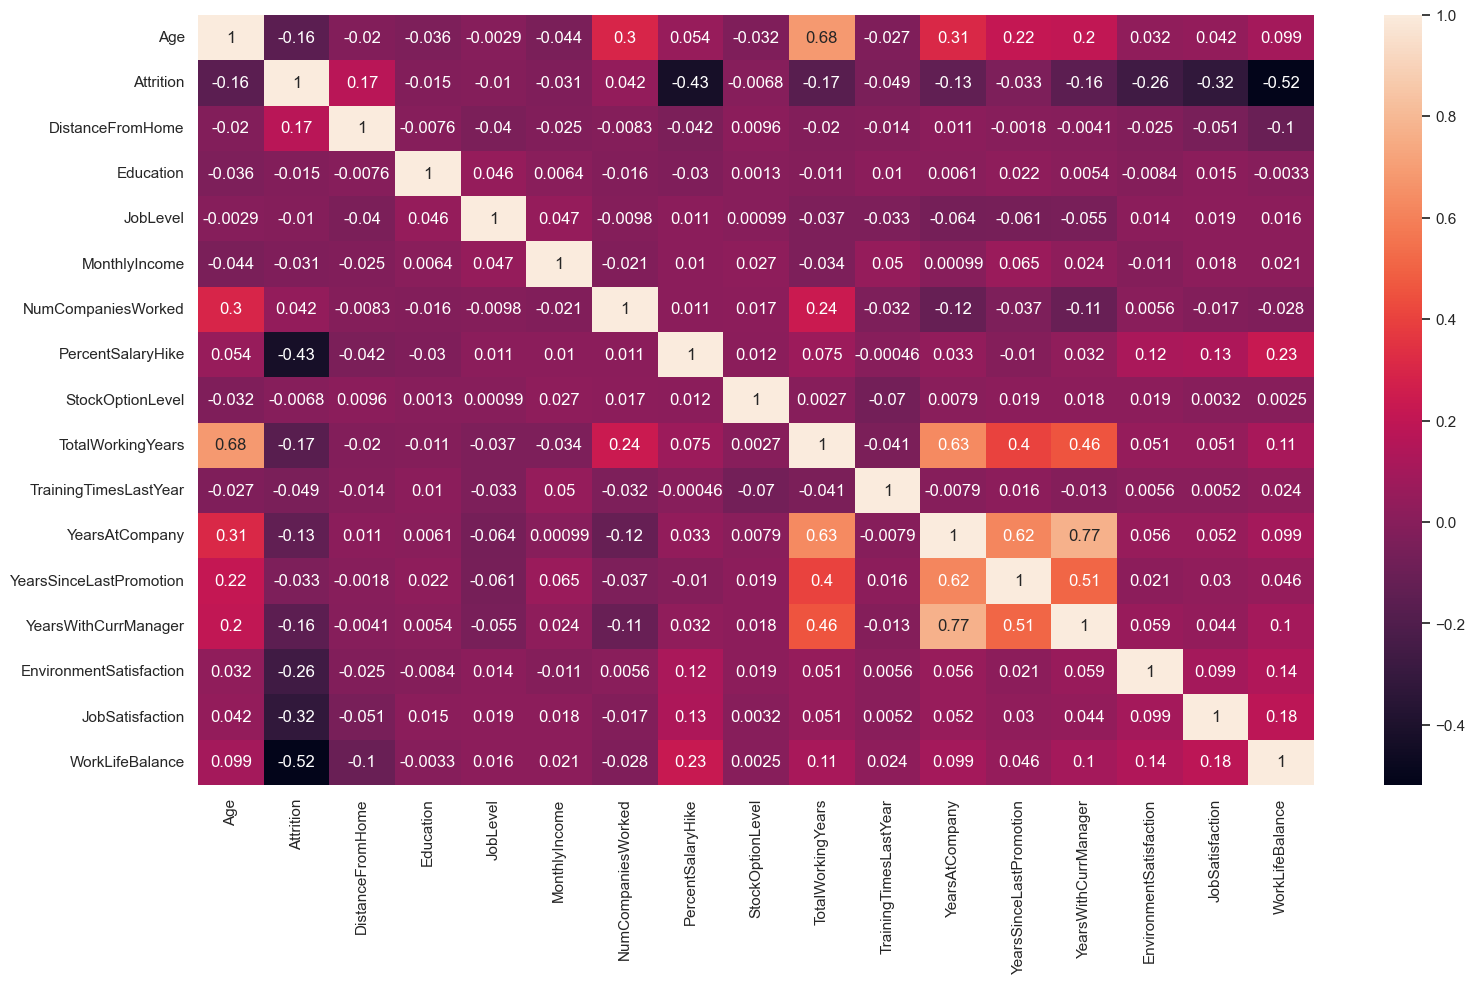

In [24]:
corr = corr_cols.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot = True)
plt.show()

Looking above, we can get a general sense of some of the relationships at play with our data.

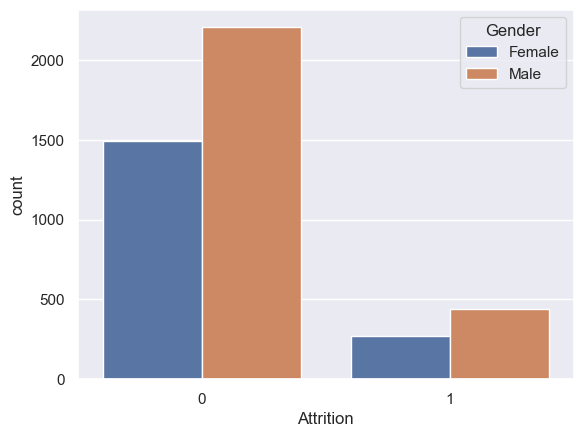

In [25]:
sns.countplot(x = "Attrition",data=data,hue="Gender")
plt.show()

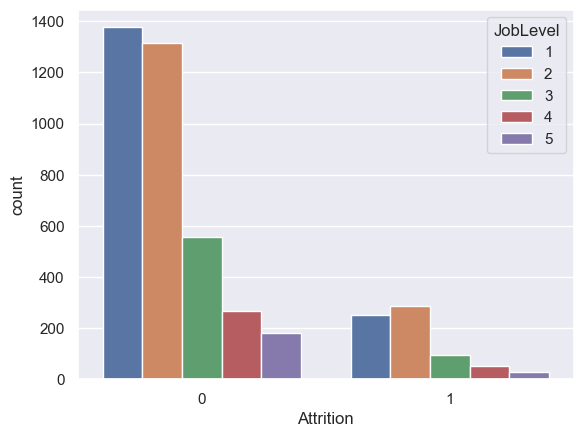

In [26]:
sns.countplot(x = "Attrition",data=data,hue="JobLevel")
plt.show()

In [27]:
#Bin the age variable into buckets for easier EDA
data['Age_Bin']=pd.cut(x = data['Age'],
                        bins = [0,30,40,50,60],
                        labels = [0, 1, 2,3])

In [28]:
data.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating', 'JobInvolvement',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'NumCompaniesWorked_Missing', 'TotalWorkngYears_Missing',
       'EnvironmentSatisfaction_Missing', 'JobSatisfaction_Missing',
       'WorkLifeBalance_Missing', 'Age_Bin'],
      dtype='object')

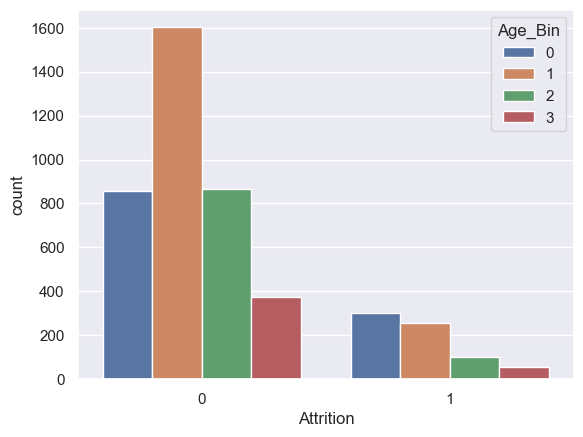

In [29]:
sns.countplot(x = "Attrition",data=data,hue="Age_Bin")
plt.show()

In [30]:
data.groupby('Attrition').mean().round(1)

/var/folders/_4/60jk4mm92bl_xrc0n8z2y4140000gn/T/ipykernel_37838/1965918915.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Attrition').mean().round(1)


,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,NumCompaniesWorked_Missing,TotalWorkngYears_Missing,EnvironmentSatisfaction_Missing,JobSatisfaction_Missing,WorkLifeBalance_Missing
Attrition,,,,,,,,,,,,,,,,,,,,,,,
0,37.6,7.4,2.9,2.1,65672.6,2.6,15.2,0.8,11.9,2.8,7.4,2.2,4.4,3.1,3.2,3.1,3.2,3.2,1.0,1.0,1.0,1.0,1.0
1,33.6,10.7,2.9,2.0,61682.6,2.9,10.3,0.8,8.3,2.7,5.1,1.9,2.9,2.2,2.3,2.3,2.4,1.9,1.0,1.0,1.0,1.0,1.0


#### Design Note 2.2

Categorical data can pose challenges for many machine learning and regression algorithims. Many models only accept numerical variables, so we must process the categorical variables we have into numeric variables. There are several strategies to do this, all of which have advantages and disadvantages. We will cover these at a basic level, starting with a strategy that is not recommended.

1. Label encoding: In label encoding, we convert the categories (```Color```: Green, Blue, Red, Orange, Yellow) into a numeric scale (Green = 1, Blue = 2, Red = 3, Orange = 4, etc.). While a model will run with this approach, label encoding introduces the interpretative and modeling challenges. By scaling these categories as numbers in a single column, we are effectively saying Blue is twice Green and Orange is four times Blue. While this technique is used in data science, this obviously is a confused interpretation and should usually be avoided.
2. One-hot encoding: This is a popular strategy where we convert each unique value in a categorical variable into its own binary dummy variable (1/0). For example, we would make each unique color value in our ```Color``` variable into a separate dummy variable. Thus, we make a new variable called ```Red``` and encode it 1 if the value was red, and 0 if it is not. We would do the same for the other variables. This approach is a common one in data science, though it can lead to sparse data sets that may diminish model performance. It also can lead to the curse of dimensionality. If we have a variable called ```cities``` and had 100 different cities around the world respresented in the variable (Beijing, London, Paris, etc.), we would need to one-hot encode 100 different variables to represent this categorical variable. 
3. Dummy encoding: Dummy encoding is a similar approach to one-hot encoding. The primary difference is that in one-hot encoding the number of additional dummy variables we create is equal to the number of unique categories in the categorical variable (n). In dummy encoding, the number of additional variables is one less than the number of unique values in the categorical variable (n-1). We make a dummy variable (similar to one-hot) for Green, Blue, Red, and Orange; however, we would not make a dummy variable for Yellow. Instead, Yellow would be represented by all 0s in the other colors. The advantage here is that we have one less variable to contend with, which helps incrementally with the curse of dimensionality. 
4. Target encoding: A less familiar example of encoding is target encoding. In this approach, we populate the categorical values for a specific varaible with the mean of the target variable. For example, if our categorical variable is ```Education``` with unique values of {High School, Bachelors, Masters, PhD} and our target variable is salary, we would populate every 'High School' value with the mean value of salary for those who 'High School' for education. If the mean high school salary was 37K INR, then we replace 'High School' values in ```Education``` with ₹37K. This technique has some potential disadvantages, such as the possibility of leakage or overfitting.

There are many other approaches to working with categorical predictors. For purposes of this exericise, we will use dummy variables.

In [31]:
#For reference, let's view the data in the categorical predictors. What are the unique values in each variable?
print(data['BusinessTravel'].unique())
print(data['EducationField'].unique())
print(data['Gender'].unique())
print(data['Department'].unique())
print(data['JobRole'].unique())
print(data['MaritalStatus'].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Life_Sciences' 'Other' 'Medical' 'Marketing' 'Technical_Degree' 'HR']
['Female' 'Male']
['Sales' 'Research_Development' 'Human_Resources']
['Healthcare_Representative' 'Sales_Executive' 'Human_Resources'
 'Research_Director' 'Laboratory_Technician' 'Manufacturing_Director'
 'Sales_Representative' 'Manager' 'Research_Scientist']
['Married' 'Single' 'Divorced']


In [32]:
#Convert the Categorical Variables to dummy variables. We use the drop_first=True option to eliminate the first

In [33]:
df = pd.get_dummies(data, columns=['Gender', 'JobRole', 'BusinessTravel','Education','EducationField','JobLevel','MaritalStatus','Department','StockOptionLevel'],drop_first=True)

#### Design Note 2.3

There are some advantages to standardizing the data before we begin building the models, particularly if we want to compare the magnitude of the coefficients. If the underlying variables have different units of measurement and variances (e.g. age vs. monthly income), then the magnitude of the coefficients are not directly comparable. If we standardize those variables (mean = 0, standard deviation = 1), then we can directly compare the coefficients. This does, however, complicate the intuition of interpretation. See the Introduction to Logistic Regression white paper for more detail. 

In [34]:
df[['Age_sd','DistanceFromHome_sd','MonthlyIncome_sd','NumCompaniesWorked_sd','PercentSalaryHike_sd','TotalWorkingYears_sd',
    'TrainingTimesLastYear_sd','YearsAtCompany_sd','YearsSinceLastPromotion_sd','YearsWithCurrManager_sd',
    'PerformanceRating_sd','JobInvolvement_sd','EnvironmentSatisfaction_sd','JobSatisfaction_sd','WorkLifeBalance_sd']] = StandardScaler().fit_transform(df[['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike',
                                       'TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion',
                                       'YearsWithCurrManager','PerformanceRating','JobInvolvement','EnvironmentSatisfaction',
                                       'JobSatisfaction','WorkLifeBalance' ]])


In [35]:
#View the results of the dummy variable process.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 68 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Attrition                         4410 non-null   int64   
 1   Age                               4410 non-null   int64   
 2   DistanceFromHome                  4410 non-null   int64   
 3   MonthlyIncome                     4410 non-null   int64   
 4   NumCompaniesWorked                4410 non-null   float64 
 5   PercentSalaryHike                 4410 non-null   int64   
 6   TotalWorkingYears                 4410 non-null   float64 
 7   TrainingTimesLastYear             4410 non-null   int64   
 8   YearsAtCompany                    4410 non-null   int64   
 9   YearsSinceLastPromotion           4410 non-null   int64   
 10  YearsWithCurrManager              4410 non-null   int64   
 11  PerformanceRating                 4410 non-null   int64 

#### Design Note 2.4

When building a classification model, it is important to understand the balance of the classes of the response variable. If we find that the classes are out-of-balance, then we would need some form of correct action.  Unbalanced data can lead to a bias where the model favors the majority class as a means to drive overall performance (accuracy) and underpredict the minority class. For example, we are building a predictive classifier for bank loans where the model classifies customer accounts into two groups: default or non-default. If in the training data, 99% of the customers do not default on their loans, then the predictive model could predict *all* the outcomes as 'non-default' and the model would be 99% accurate. 

Looking at the data below, we see that our reponse variable (attrition) has more 0s (non-attrition of an employee) than 1s (attrition of employees). Specifically, only 16% of our data set consists of attrition records (1s). This imbalance can hurt the overall model performance, so we need to consider solutions. There are two common approaches to class imbalance:

1. Over or under sample. One approach common to data science is balancing the classess of the response variable by either deleting cases of the majority class (undersampling) or duplicating samples from the minority class (oversampling). Through these two approaches, we can bring balance to a response varaible. While this does solve the class imbalance problem, the sampling processs does introduce sampling bias to the process. A third option is to oversample some and undersample some to bring the classes into balance.

2. A second strategy available in some classification algorithms is to use a weighted penalty for prediction errors associated with the minority class. Under these scenarios, the algorithm enacts lighter penalties for prediction errors for the majority class, and enforces heftier penalties for errors associated with the majority class. Not every stats/machine learning package has this option, though sklearn does offer weighting for logistic regression.

Given the lack of balance in the response variable, we will employ a technique above. We'll use SMOTE in this example.

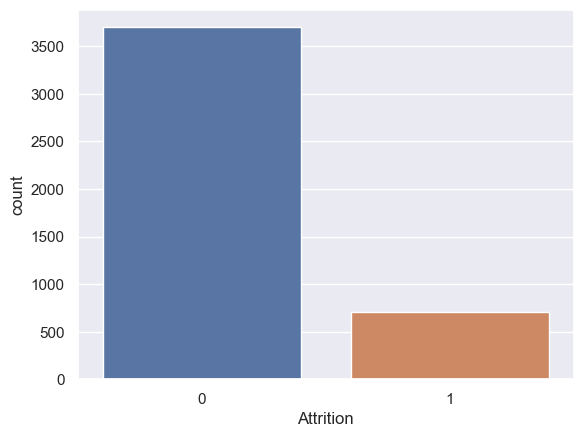

The percentage of employees leaving is 16%


In [36]:
sns.countplot(x = "Attrition",data=data)
plt.show()
print('The percentage of employees leaving is ' +  "{:.0%}".format(df['Attrition'].mean()))

Before we can balance our response variable with SMOTE, we need to separate our validation and test set (so we do not alter its composition). We want to keep the imbalance in test because that is our reality-check. We remove the imbalance in the training data to improve the model performance, which we can validate on the unbalanced test set. 

In [37]:
#Use the function below to create a training [70%], validation [15%], and test set [15%].
def train_validate_test_split(df, train_percent=.7, validate_percent=.15, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

In [38]:
train, validate, test = train_validate_test_split(df)

In [39]:
#set the smote up
y = train['Attrition']
X = train.drop(['Attrition'], axis = 1)
sm = SMOTE(random_state=42)

In [40]:
X_sm, y_sm = sm.fit_resample(X, y)

In [41]:
#Notice that the shape of X before and after rebalancing.
#The data frame has grown to include more cases of where employee attrition = 1.
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

Shape of X before SMOTE: (3087, 67)
Shape of X after SMOTE: (5192, 67)


In [42]:
#Check that response variable is now balanced (i.e. 50% of the cases are when attrition = 1)
y_sm.mean()

0.5

In [43]:
#Remerge the data
tr_sm = pd.concat([y_sm, X_sm], axis=1)
tr_sm.shape

(5192, 68)

Now that we have addressed some of the basic issues with our original data, we can export the train, validate, and move on to the model building phase.

In [37]:
tr_sm.to_csv(r'../Hr Analytics/data/train.csv')
validate.to_csv(r'../Hr Analytics/data/validate.csv')
test.to_csv(r'../Hr Analytics/data/test.csv')